# More Features = More Accurate?

Let's try to learn using more features this time!

Picking... Pclass, Sex, Age, SibSp, Parch, ... let's just try using all of them?

In [6]:
%load_ext autoreload
%autoreload 2


import tools.extract as ex
import tools.transform as tr

train, test = ex.load("data")

DATA_SIZE = len(train)
VALIDATION_SIZE = int(len(train) * 1/8)
TRAIN_SIZE = DATA_SIZE - VALIDATION_SIZE

from sklearn.utils import shuffle

shuffled = shuffle(train)

validation_set = shuffled [ TRAIN_SIZE: ]
training_set = shuffled [ :TRAIN_SIZE ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import tools.extract as ex
import tools.transform as tr

import pandas
pandas.options.mode.chained_assignment = None  # default='warn'

# 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
# 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

features = ['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]

def transform(data):
    selected = tr.select(data, features)
    selected["Sex"], _ = ( tr.encode_categories( selected, "Sex" ))
    selected["Cabin"], _ = ( tr.encode_categories( selected, "Cabin" ))
    selected["Embarked"], _ = ( tr.encode_categories( selected, "Embarked" ))
    selected["Ticket"], _ = ( tr.encode_categories( selected, "Ticket" ))
    
    selected["Fare"] = tr.set_NaN(selected, "Fare", 0)

    selected["Age"] = tr.set_NaN(selected, "Age", 0)
    return selected

import tools.classifiers.decision_tree as dt
import tools.predict as p

labels = training_set['Survived']

tree = dt.DecisionTree(features)
p.train(tree, transform(training_set), labels)

val_predictions = p.predict(tree, transform(validation_set))
train_predictions = p.predict(tree, transform(training_set))

ID = "PassengerId"
LABEL = "Survived"

In [8]:
def accuracy( predicted, ground_truth, printf = False ):
    correct = (predicted == ground_truth).sum()
    if printf:
        print( "correct/total: " + str(correct) +"/"+ str(len(predicted)))
        print( "accuracy: " + str(correct/len(predicted)) )
    return correct/len(predicted)

print("Training data:")
accuracy(train_predictions, training_set['Survived'], printf = True)
print("\n\nValidation data:")
accuracy(val_predictions, validation_set['Survived'], printf = True)

Training data:
correct/total: 779/780
accuracy: 0.998717948718


Validation data:
correct/total: 77/111
accuracy: 0.693693693694


0.69369369369369371

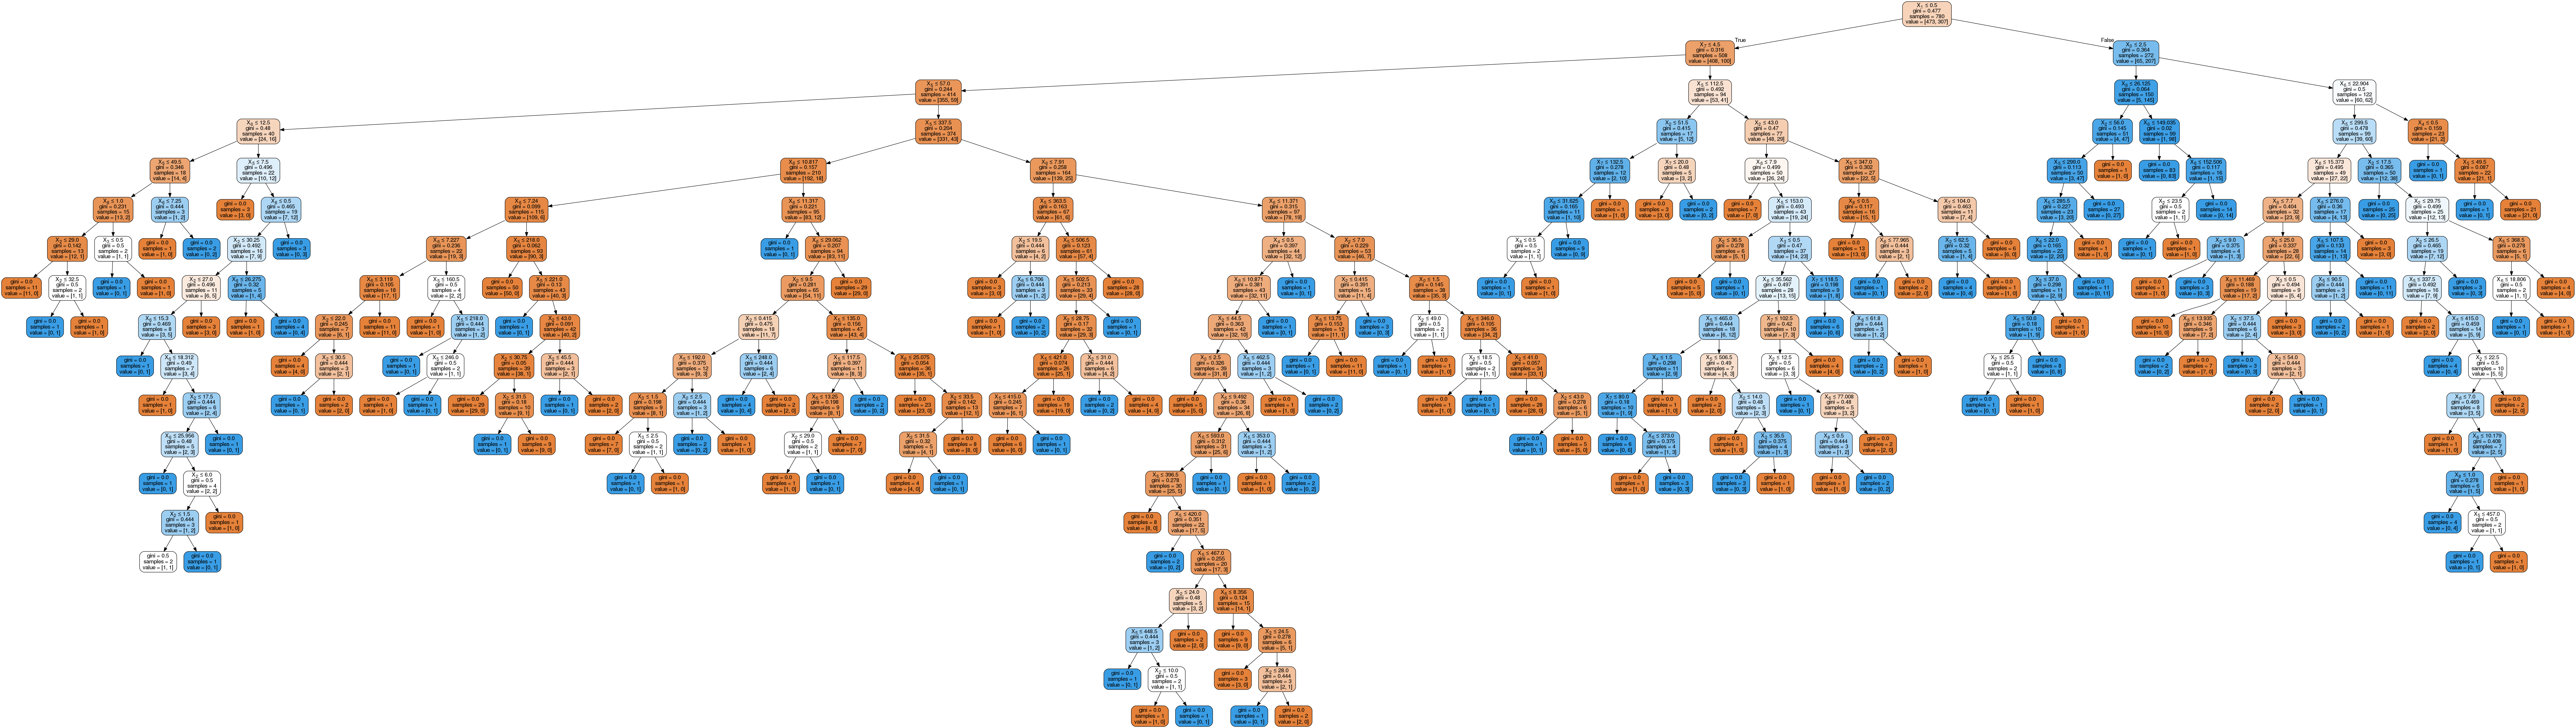

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree.model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
train, test = ex.load("data")

ID = "PassengerId"
LABEL = "Survived"

predictions = p.predict(tree, transform(test))

p.save( "02.csv", [ID, LABEL], test[ID], predictions)

Saved file: 02.csv
